Gathering OPEC oil prices data from `csv` file on Quandl website

In [1]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import from Quandl OPEC crude oil price data
url = "https://www.quandl.com/api/v3/datasets/OPEC/ORB.csv?api_key=Xh6-6KZVi_A7CJAtJnjP"
opec = pd.read_csv(url,index_col=0, parse_dates=True)
opec.sort_index(inplace=True) #sort the index (date) ascending
opec.head(5)

,Value
Date,
2003-01-02,30.05
2003-01-03,30.83
2003-01-06,30.71
2003-01-07,29.72
2003-01-08,28.86


In [3]:
opec_price = opec['Value'] #create a series for plotting later on
opec['PctCh']=opec['Value'].pct_change()
opec.head(5)

,Value,PctCh
Date,,
2003-01-02,30.05,NaN
2003-01-03,30.83,0.025957
2003-01-06,30.71,-0.003892
2003-01-07,29.72,-0.032237
2003-01-08,28.86,-0.028937


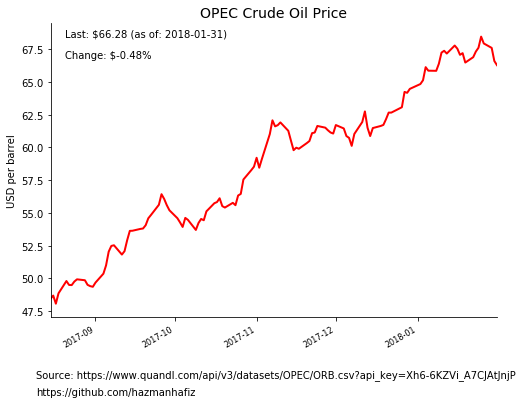

In [4]:
#plotting the data
fig = plt.figure(figsize=[8,6])
ax1 = plt.subplot(111)
line = opec_price.tail(120).plot(color='red', linewidth=2) #tail(120) means selecting historical data for the past 120 days
ax1.set_ylabel('USD per barrel')
ax1.set_xlabel(' ')
ax1.set_title('OPEC Crude Oil Price', fontsize=14)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis='x',which='major', labelsize=8)

#insert text onto the plot
fig.text(0.15, 0.85, 'Last: $'+str(opec_price[-1])\
         +' (as of: ' \
         + str(opec.index[-1].strftime('%Y-%m-%d'))\
         + ')') 
fig.text(0.15, 0.80, 'Change: $' + str((np.round((opec['PctCh'][-1]*100),decimals=2))) + '%')

fig.text(0.1,0.06, 'Source: ' + url)

fig.text(0.1, 0.02, 'https://github.com/hazmanhafiz')

plt.savefig('opecoil.png', dpi=1000)